In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df=df.drop(df.columns[0],axis=1)

In [5]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df['Ram']=df['Ram'].str.replace("GB",'')
df['Weight']=df['Weight'].str.replace("kg",'')

In [7]:
import seaborn as sn

C:\Users\Vrajesh\AppData\Local\Temp\ipykernel_20068\427044340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df["Price"],hist=False)


<Axes: xlabel='Price', ylabel='Density'>

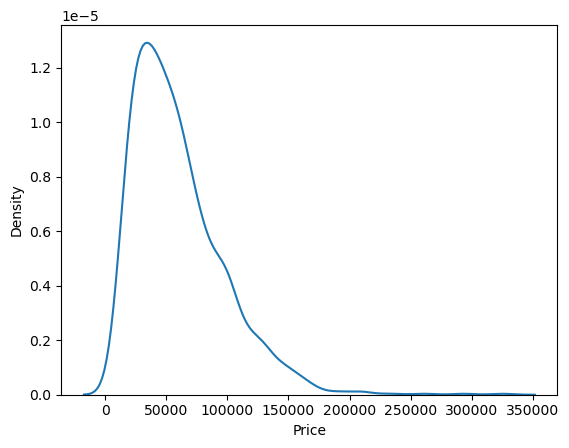

In [8]:
sn.distplot(df["Price"],hist=False)

<Axes: >

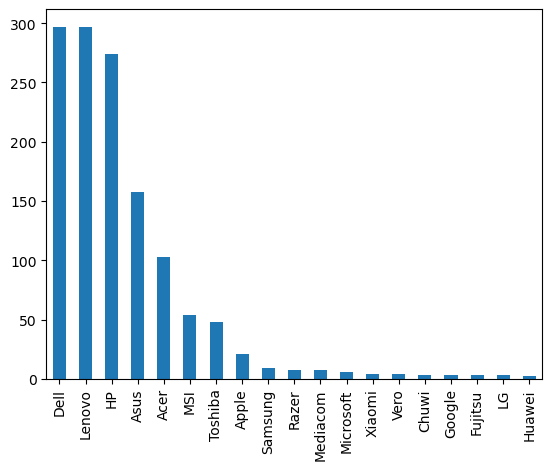

In [9]:
df['Company'].value_counts().plot(kind="bar")

In [10]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [11]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0 )

In [12]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [13]:
df["ips"]=df["ScreenResolution"].apply(lambda x : 1 if "IPS" in x else 0 )

<Axes: >

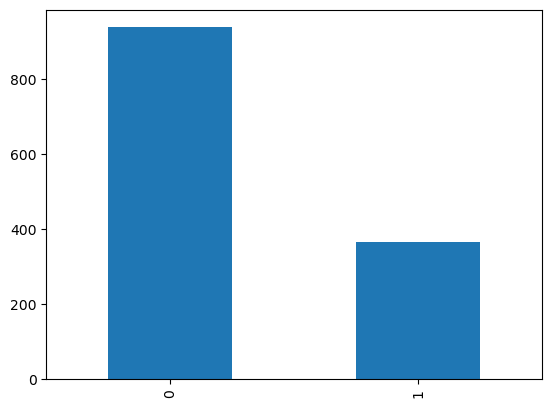

In [14]:
df["ips"].value_counts().plot(kind="bar")

In [15]:
new=df["ScreenResolution"].str.split('x',n=1,expand=True)
df["X_res"]=new[0]
df["Y_res"]=new[1]

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [17]:
df["X_res"]=df['X_res'].str.findall(r'\d+')
df["X_res"]=df["X_res"].apply(lambda x : x[0])

In [18]:
df.head(20)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1,21312.0000,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3,79653.6000,0,0,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6,41025.6000,0,1,1920,1080


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [20]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [21]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


(1303, 15)

In [22]:
# df=df.drop(df.columns[3],axis=1)
df['Weight']=df['Weight'].apply(float)
df['X_res']=df['X_res'].apply(int)
df['Y_res']=df['Y_res'].apply(int)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 152.8+ KB


In [25]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [26]:
df['Cpu']=df["Cpu"].apply(lambda x : x.split(" ")[0:3])
df['Cpu']=df["Cpu"].apply(lambda x : " ".join(x))


In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [28]:
def processor(text):
    if text =='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else :
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else :
            return "AMD Processor"
df["Cpu brand"]=df["Cpu"].apply(processor)

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res,Cpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5


<Axes: >

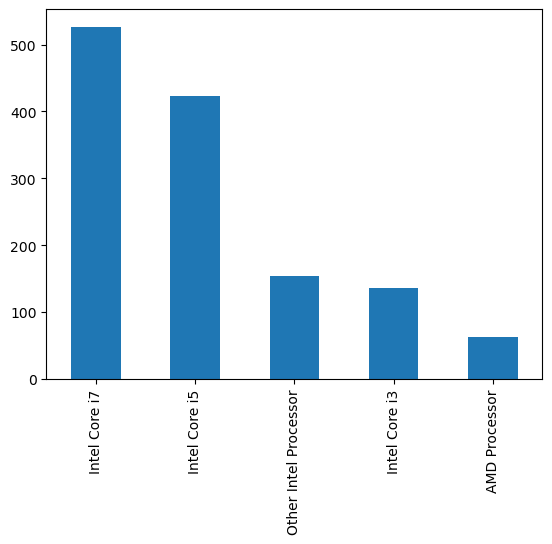

In [30]:
df["Cpu brand"].value_counts().plot(kind="bar")

In [31]:
df.drop(df.columns[3],axis=1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,Other Intel Processor
1301,HP,Notebook,15.6,Intel Core i7,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,Intel Core i7


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
 15  Cpu brand         1303 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory 

In [33]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [34]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Vrajesh\AppData\Local\Temp\ipykernel_20068\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Vrajesh\AppData\Local\Temp\ipykernel_20068\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,256,0,0


In [36]:
df.drop(columns=["Cpu"],inplace=True)

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,256,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   object 
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  ips               1303 non-null   int64  
 12  X_res             1303 non-null   int64  
 13  Y_res             1303 non-null   int64  
 14  Cpu brand         1303 non-null   object 
 15  HDD               1303 non-null   int64  
 16  SSD               1303 non-null   int64  


In [39]:
df.corr()["Price"]

C:\Users\Vrajesh\AppData\Local\Temp\ipykernel_20068\1734695575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Inches           0.068197
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
ips              0.252208
X_res            0.083832
Y_res            0.552809
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [40]:
df=df.drop(columns=["Hybrid","Flash_Storage"])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   object 
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  ips               1303 non-null   int64  
 12  X_res             1303 non-null   int64  
 13  Y_res             1303 non-null   int64  
 14  Cpu brand         1303 non-null   object 
 15  HDD               1303 non-null   int64  
 16  SSD               1303 non-null   int64  


In [42]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [43]:
df["Gpu_Brand"]=df["Gpu"].apply(lambda x : x.split()[0])

In [44]:
df["Gpu_Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [45]:
df=df[df["Gpu_Brand"]!="ARM"]

In [46]:
df["Gpu_Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

<Axes: xlabel='Gpu_Brand', ylabel='Price'>

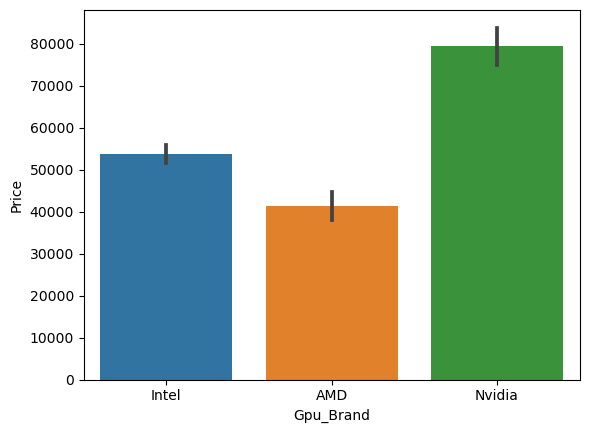

In [47]:
sn.barplot(x=df["Gpu_Brand"],y=df["Price"])

In [48]:
df.drop(columns=["Gpu"],inplace=True)

In [49]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,256,Intel


In [50]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [51]:
def os(text):
    if "Windows" in text:
      return "Windows"
    elif "macOS" in text or "Mac OS X" in text :
        return "Mac";
    else:
        return "Otheros"
df["Os"]=df["OpSys"].apply(os) 

In [52]:
df=df.drop(columns=["OpSys"])

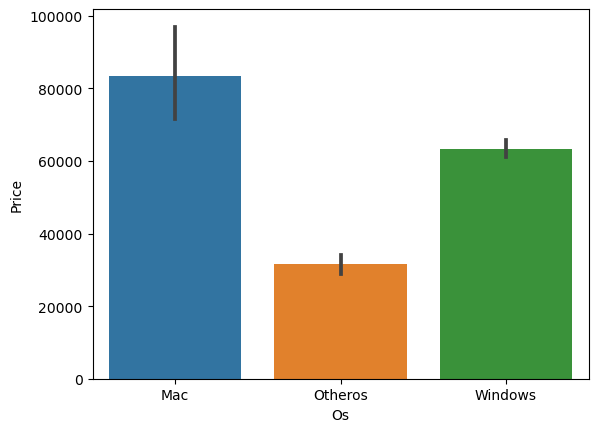

In [53]:
sn.barplot(x=df['Os'],y=df["Price"])
plt.show()

C:\Users\Vrajesh\AppData\Local\Temp\ipykernel_20068\853596285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df["Price"]),hist=False)


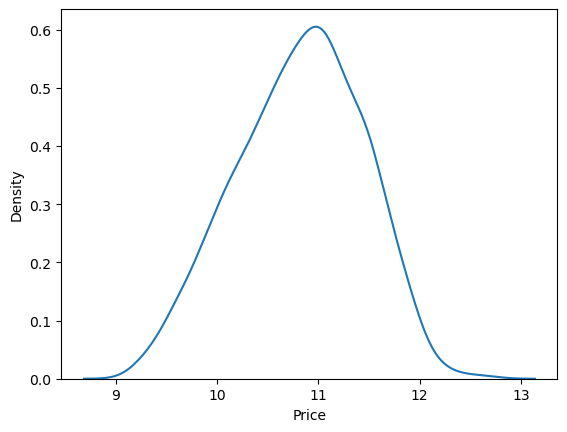

In [54]:
sn.distplot(np.log(df["Price"]),hist=False)
plt.show()

In [55]:
x=df.drop(columns=['Price','Memory',"ScreenResolution"])
y=np.log(df["Price"])

In [56]:
x.head()

,Company,TypeName,Inches,Ram,Weight,Touchscreen,ips,X_res,Y_res,Cpu brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,13.3,8,1.37,0,1,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,1920,1080,Intel Core i5,0,256,Intel,Otheros
3,Apple,Ultrabook,15.4,16,1.83,0,1,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,2560,1600,Intel Core i5,0,256,Intel,Mac


In [57]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [59]:
print(f'{X_train.shape} {X_test.shape} {Y_test.shape} {Y_train.shape}')

(1106, 14) (196, 14) (196,) (1106,)


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV

In [62]:
step1=ColumnTransformer(transformers=[
                       ("col_tnf2",StandardScaler(),[2,3,7,8,11]),                   
    ("col_tnf1",OneHotEncoder(handle_unknown="ignore",drop="first"),[0,1,9,5,6,12,13])
],remainder="passthrough")
lin=LinearRegression()
pip1=Pipeline([
    ("s1",step1),
    ("s2",lin)
])
pip1.fit(X_train,Y_train)
Y_prid1=pip1.predict(X_test)
print(r2_score(Y_test,Y_prid1))

0.8000958712595015


In [71]:
random=RandomForestRegressor()
pip2=Pipeline([
    ("s1",step1),
    ("s2",random)
])
pip2.fit(X_train,Y_train)
Y_prid2=pip2.predict(X_test)
Ytrain=pip2.predict(X_train)
print(r2_score(Y_test,Y_prid2))
print(r2_score(Ytrain,Y_train))
print(Ytrain)

0.8877198472112915
0.9792301200839582
[10.6524126  11.05827952  9.68140928 ... 10.30551943 10.13449017
 11.08680016]


In [64]:
Dtree=DecisionTreeRegressor()
pip3=Pipeline([
    ("s1",step1),
    ("s2",Dtree)
])
pip3.fit(X_train,Y_train)
Y_prid3=pip3.predict(X_test)
print(r2_score(Y_test,Y_prid3))

0.8049471646675923


In [65]:
xgb=XGBRegressor()
pip4=Pipeline(steps=[
    ("s1",step1),
    ("s2",xgb)
])
pip4.fit(X_train,Y_train)
Y_prid4=pip4.predict(X_test)
print(r2_score(Y_prid4,Y_test))

0.8825849860092451


In [67]:
import pickle

In [68]:
pickle.dump(pip2,open("pipeline.pkl",'wb'))